In [1]:
import xarray as xr 
import dask as da
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.colors as cl
import pandas as pd

## Datasets

In [2]:
ds_pr = xr.open_dataset(r'C:/Users/Josemanuel/Desktop/Tesina/Data/CR2MET_pr_v2.0_day_1979_2020_005deg.nc')
ds_t2m = xr.open_dataset(r'C:/Users/Josemanuel/Desktop/Tesina/Data/CR2MET_t2m_v2.0_day_1979_2020_005deg.nc')
ds_SWE = xr.open_dataset(r'C:/Users/Josemanuel/Desktop/Tesina/Resultados/SWE_day_1979_2020_7.nc')

portillo1 = pd.read_csv(r'C:/Users/Josemanuel/Desktop/Tesina/Data/Portillo/portillo_1.csv')
portillo2 = pd.read_csv(r'C:/Users/Josemanuel/Desktop/Tesina/Data/Portillo/portillo_2.csv')
portillo3 = pd.read_csv(r'C:/Users/Josemanuel/Desktop/Tesina/Data/Portillo/portillo_3.csv')
portillo4 = pd.read_csv(r'C:/Users/Josemanuel/Desktop/Tesina/Data/Portillo/portillo_4.csv')

### Data

In [3]:
ds_t2m

<xarray.Dataset>
Dimensions:  (lat: 800, lon: 220, time: 15096)
Coordinates:
  * lat      (lat) float32 -56.97 -56.92 -56.88 -56.83 ... -17.12 -17.08 -17.02
  * lon      (lon) float32 -76.97 -76.93 -76.88 -76.82 ... -66.12 -66.07 -66.03
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-04-30
Data variables:
    t2m      (time, lat, lon) float32 ...
Attributes: (12/20)
    creation_date:       21-Sep-2020 19:15:10
    ls_vars_s2:          tmin tmina tmax tmaxa t2m t2ma t850 t850a t700 td2m ...
    nb_months:           -1  0  1
    av_ens_qtl:          0.0
    agg_metr:            median
    authors:             Boisier et al.
    ...                  ...
    par_nd_stn_min:      10
    par_nd_stn_spl:      50
    par_dlat_min:        2
    par_dlat_max:        15
    history:             Wed Jan 22 12:11:25 2020: ncks -v tmin /home/nvaldeb...
    NCO:                 netCDF Operators version 4.7.9 (Homepage = httpwrite...

In [4]:
ds_pr

<xarray.Dataset>
Dimensions:  (lat: 800, lon: 220, time: 15096)
Coordinates:
  * lat      (lat) float32 -56.97 -56.92 -56.88 -56.83 ... -17.12 -17.08 -17.02
  * lon      (lon) float32 -76.97 -76.93 -76.88 -76.82 ... -66.12 -66.07 -66.03
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-04-30
Data variables:
    pr       (time, lat, lon) float32 ...
    pr_sd    (time, lat, lon) float32 ...
Attributes: (12/23)
    creation_date:        21-Sep-2020 18:52:02
    authors:              Boisier et al.
    topo_res:             005 025 05
    ls_vars:              pr logpr prc iqu iqv tcw w700 dpr slpa z300a
    obs_file:             CR2stn_QC_pr_day_1979_2018
    par_ens_size:         30
    ...                   ...
    par_use_logit:        1
    par_dlat_min:         3
    par_pday_min:         0.5
    ens_agg_metric:       quantile
    ens_qtl_value:        0.5
    ens_force_dry:        0

In [5]:
ds_SWE

<xarray.Dataset>
Dimensions:  (time: 15096, lat: 800, lon: 220)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-04-30
  * lat      (lat) float32 -56.97 -56.92 -56.88 -56.83 ... -17.12 -17.08 -17.02
  * lon      (lon) float32 -76.97 -76.93 -76.88 -76.82 ... -66.12 -66.07 -66.03
Data variables:
    swe      (time, lat, lon) float32 ...
    snow_f   (time, lat, lon) float32 ...
    abla     (time, lat, lon) float32 ...

## Testing

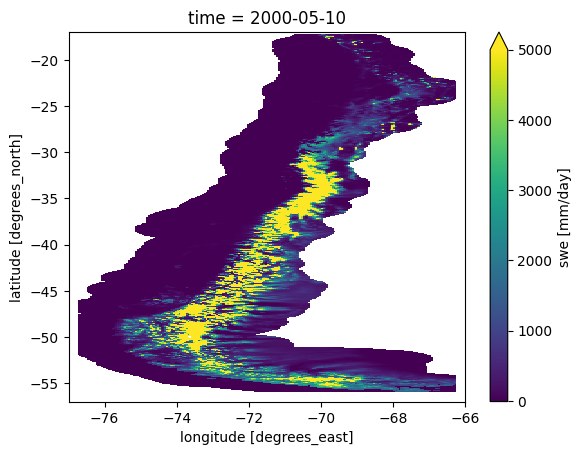

In [6]:
ds_SWE['swe'][7800,:,:].plot(vmin=-10,vmax=5000) #vmin=-10,vmax=5000

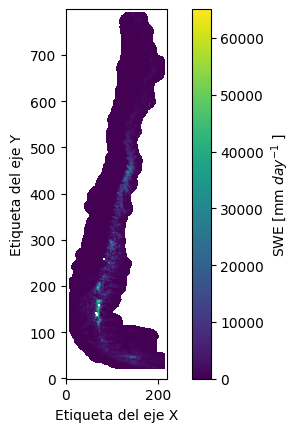

In [7]:
que = ds_SWE['swe'][7800, :, :]

# Utilizar .values para obtener la matriz NumPy
que_values = que.values

# Configuración del gráfico con plt.imshow
plt.imshow(que_values, origin='lower') #vmin=-10, vmax=5000

# Configuraciones adicionales si es necesario

plt.xlabel('Etiqueta del eje X')
plt.ylabel('Etiqueta del eje Y')
plt.colorbar(label='SWE [mm $day^{-1}$ ]')

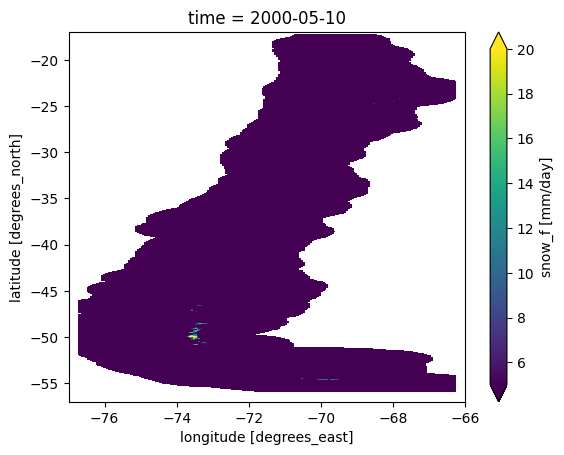

In [8]:
ds_SWE['snow_f'][7800,:,:].plot(vmin=5,vmax=20) #vmin=-10,vmax=5000

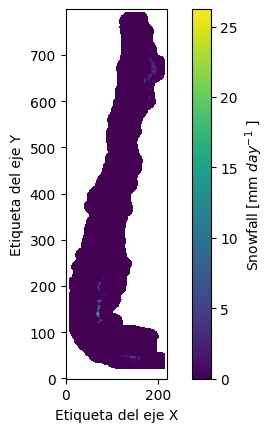

In [9]:
que1 = ds_SWE['snow_f'][7800, :, :]

# Utilizar .values para obtener la matriz NumPy
que_values1 = que1.values

# Configuración del gráfico con plt.imshow
plt.imshow(que_values1, origin='lower') #vmin=-10, vmax=5000

# Configuraciones adicionales si es necesario

plt.xlabel('Etiqueta del eje X')
plt.ylabel('Etiqueta del eje Y')
plt.colorbar(label='Snowfall [mm $day^{-1}$ ]')

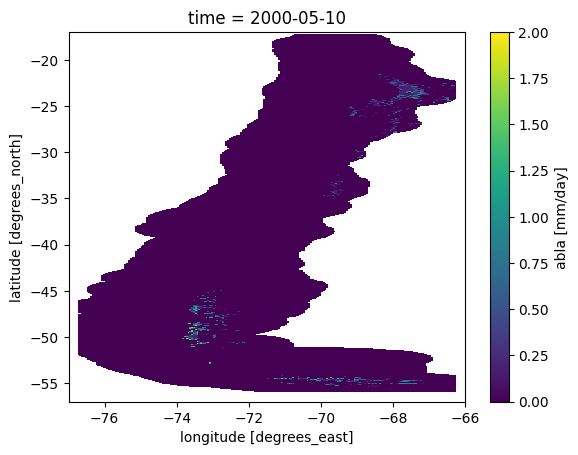

In [10]:
ds_SWE['abla'][7800,:,:].plot(vmin=0.0,vmax=2.0) #vmin=-10,vmax=5000

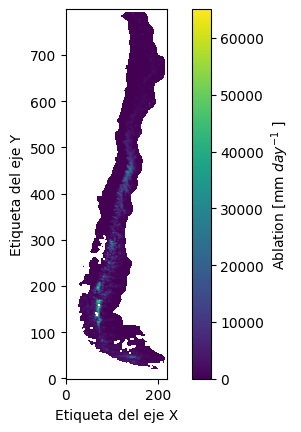

In [4]:
que2 = ds_SWE_7['swe'][7800, :, :]

# Utilizar .values para obtener la matriz NumPy
que_values2 = que2.values

# Configuración del gráfico con plt.imshow
plt.imshow(que_values2, origin='lower') #vmin=-10, vmax=5000

# Configuraciones adicionales si es necesario

plt.xlabel('Etiqueta del eje X')
plt.ylabel('Etiqueta del eje Y')
plt.colorbar(label='Ablation [mm $day^{-1}$ ]')

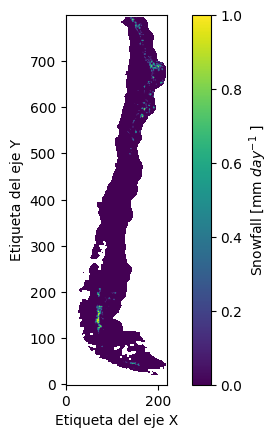

In [5]:
que1 = ds_SWE_6['k'][7, :, :]

# Utilizar .values para obtener la matriz NumPy
que_values1 = que1.values

# Configuración del gráfico con plt.imshow
plt.imshow(que_values1, origin='lower') #vmin=-10, vmax=5000

# Configuraciones adicionales si es necesario

plt.xlabel('Etiqueta del eje X')
plt.ylabel('Etiqueta del eje Y')
plt.colorbar(label='Snowfall [mm $day^{-1}$ ]')

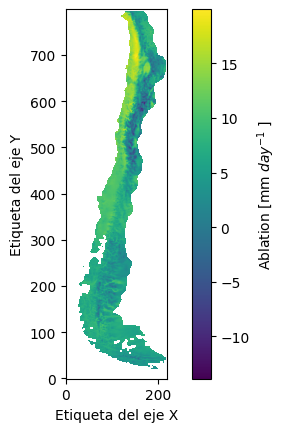

In [10]:
que2 = ds_t2m['t2m'][7800, :, :]

# Utilizar .values para obtener la matriz NumPy
que_values2 = que2.values

# Configuración del gráfico con plt.imshow
plt.imshow(que_values2, origin='lower') #vmin=-10, vmax=5000

# Configuraciones adicionales si es necesario

plt.xlabel('Etiqueta del eje X')
plt.ylabel('Etiqueta del eje Y')
plt.colorbar(label='Ablation [mm $day^{-1}$ ]')

In [12]:
pt['swe'].plot()

NameError: name 'pt' is not defined

Text(0, 0.5, 'SWE [mm $day^{-1}$ ]')

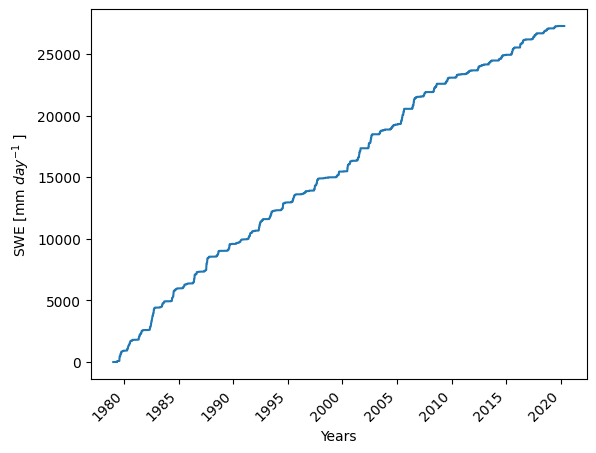

In [ ]:
que2 = pt_swe['swe']

# Utilizar .values para obtener la matriz NumPy

# Configuración del gráfico con plt.imshow
plt.plot(que2.time, que2.values)

# Configuraciones adicionales si es necesario

plt.xlabel('Years')
plt.xticks(rotation=45, ha='right')
plt.ylabel('SWE [mm $day^{-1}$ ]')

#plt.colorbar(label='Ablation [mm $day^{-1}$ ]')

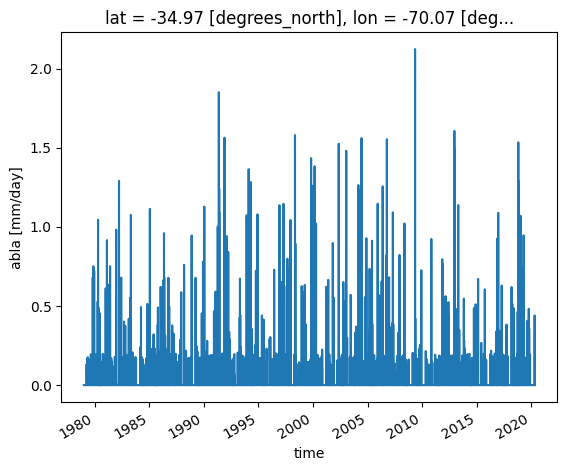

In [ ]:
pt['abla'].plot()

Text(0, 0.5, 'Ablation [mm $day^{-1}$ ]')

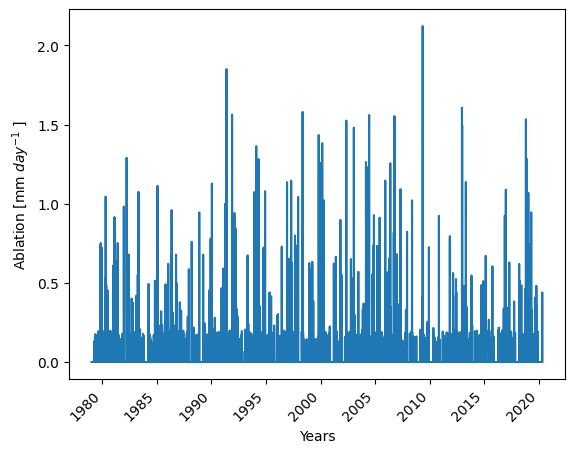

In [ ]:
que2 = pt['abla']

# Utilizar .values para obtener la matriz NumPy
que_values2 = que2.values

# Configuración del gráfico con plt.imshow
plt.plot(que2.time, que2.values)

# Configuraciones adicionales si es necesario

plt.xlabel('Years')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ablation [mm $day^{-1}$ ]')

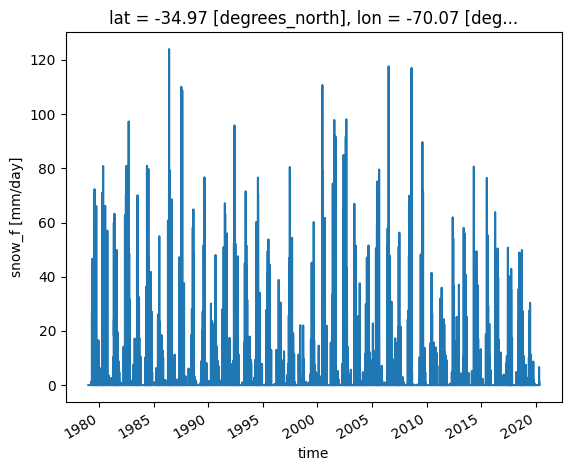

In [ ]:
pt['snow_f'].plot()

Text(0, 0.5, 'Snowfall [mm $day^{-1}$ ]')

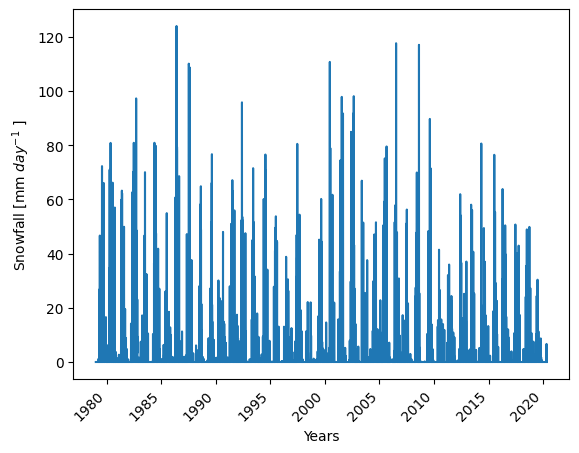

In [ ]:
que2 = pt['snow_f']

# Utilizar .values para obtener la matriz NumPy
que_values2 = que2.values

# Configuración del gráfico con plt.imshow
plt.plot(que2.time, que2.values)

# Configuraciones adicionales si es necesario

plt.xlabel('Years')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Snowfall [mm $day^{-1}$ ]')

## Analisis

#### Funciones

In [3]:
def plot_swe_abla_snowfall_t_p_xday(i):

    fig, axs = plt.subplots(1, 5, figsize=(15, 10))

    # Subplot 1

    x1 = ds_SWE['swe'][i, :, :]
    x1_values = x1.values
    img1 = axs[0].imshow(x1_values, origin='lower')  # vmin=-10, vmax=5000
    cbar1 = plt.colorbar(img1, ax=axs[0], label='SWE [mm $day^{-1}$]')
    cbar1.set_label('SWE [mm $day^{-1}$]')
    # Obtener la fecha actual y formatearla
    fecha_actual = ds_SWE['time'].values[i].astype('M8[D]').astype('O')  # Asegura que sea un objeto datetime
    fecha_str = fecha_actual.strftime('%Y-%m-%d')
    
    # Agregar la fecha como texto en el subplot 1
    axs[0].text(0.62, 0.01, fecha_str, transform=axs[0].transAxes, color='black', ha='right', va='bottom', fontsize=10)
    #axs[0].set_title('Subplot 1')

    # Subplot 2

    x2 = ds_SWE['abla'][i, :, :]
    x2_values = x2.values
    img2 = axs[1].imshow(x2_values, origin='lower')  # vmin=-10, vmax=5000
    #axs[1].set_title('Subplot 2')
    cbar2 = plt.colorbar(img2, ax=axs[1], label='Ablation [mm $day^{-1}$]')  # Cambia 'Abc' por tu leyenda deseada
    cbar2.set_label('Ablation [mm $day^{-1}$]')
    # Agregar la fecha como texto en el subplot 1
    #axs[1].text(2.84, 0.01, fecha_str, transform=axs[0].transAxes, color='black', ha='right', va='bottom', fontsize=10)


    # Subplot 3

    x3 = ds_SWE['snow_f'][i, :, :]
    x3_values = x3.values
    img3 = axs[2].imshow(x3_values, origin='lower')  # vmin=-10, vmax=5000
    #axs[2].set_title('Subplot 3')
    cbar3 = plt.colorbar(img3, ax=axs[2], label='Snowfall [mm $day^{-1}$]')  # Cambia 'Xyz' por tu leyenda deseada
    cbar3.set_label('Snowfall [mm $day^{-1}$]')
    # Agregar la fecha como texto en el subplot 1
    #axs[2].text(4.94, 0.01, fecha_str, transform=axs[0].transAxes, color='black', ha='right', va='bottom', fontsize=10)

    # Subplot 4

    x4 = ds_t2m['t2m'][i, :, :]
    x4_values = x4.values
    img4 = axs[3].imshow(x4_values, origin='lower')  # vmin=-10, vmax=5000
    #axs[2].set_title('Subplot 3')
    cbar4 = plt.colorbar(img4, ax=axs[3], label='Temperature [Celsius]')  # Cambia 'Xyz' por tu leyenda deseada
    cbar4.set_label('Temperature [Celsius]')
    # Agregar la fecha como texto en el subplot 1
    #axs[3].text(4.25, 0.01, fecha_str, transform=axs[0].transAxes, color='black', ha='right', va='bottom', fontsize=10)


    # Subplot 5

    x5 = ds_pr['pr'][i, :, :]
    x5_values = x5.values
    img5 = axs[4].imshow(x5_values, origin='lower')  # vmin=-10, vmax=5000
    #axs[2].set_title('Subplot 3')
    cbar5 = plt.colorbar(img5, ax=axs[4], label='Precipitation [mm $day^{-1}$')  # Cambia 'Xyz' por tu leyenda deseada
    cbar5.set_label('Precipitation [mm $day^{-1}$')
    # Agregar la fecha como texto en el subplot 1
    #axs[4].text(5.25, 0.01, fecha_str, transform=axs[0].transAxes, color='black', ha='right', va='bottom', fontsize=10)


    # Configuraciones adicionales
    #for ax in axs:
        #ax.grid(True)

    plt.tight_layout()
    return plt.show()
    

In [4]:
def plot_swe_abla_snowfall_t_p_xcoordenadas(latitud, longitud):

     fig = plt.figure(figsize=(20, 5))

     ax1 = plt.subplot(141)
     ax2 = plt.subplot(242)
     ax3 = plt.subplot(243)
     ax4 = plt.subplot(246)
     ax5 = plt.subplot(247)
     ax6 = plt.subplot(144)

     pt_swe  = ds_SWE.sel(lat=latitud, lon=longitud, method='nearest') #-35., lon=-70.1
     pt_t2m  = ds_t2m.sel(lat=latitud, lon=longitud, method='nearest')
     pt_pr  = ds_pr.sel(lat=latitud, lon=longitud, method='nearest')


     x1 = pt_swe['swe']
     x2 = pt_swe['abla']
     x3 = pt_swe['snow_f']
     x4 = pt_t2m['t2m']
     x5 = pt_pr['pr']


     ax1.plot(x1.time, x1.values, c='blueviolet')
     ax1.set_xlabel('Year')
     ax1.set_ylabel('SWE [mm $day^{-1}$]')
     ax1.text(0.5, 0.95, f'lat={latitud}, lon={longitud}', ha='center', va='center', transform=ax1.transAxes,
         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

     ax2.plot(x2.time, x2.values, c='blueviolet')
     ax2.set_xlabel('Year')
     ax2.set_ylabel('Ablation [mm $day^{-1}$]')

     ax3.plot(x3.time, x3.values, c='blueviolet')
     ax3.set_xlabel('Year')
     ax3.set_ylabel('Snowfall [mm $day^{-1}$]')

     ax4.plot(x4.time, x4.values, c='blueviolet')
     ax4.set_xlabel('Year')
     ax4.set_ylabel('Temperature [Celsius]')

     ax5.plot(x5.time, x5.values, c='blueviolet')
     ax5.set_xlabel('Year')
     ax5.set_ylabel('Precipitation [mm $day^{-1}$]')

     # Visualización del mapa
     df_chile = gpd.read_file(r'C:/Users/Josemanuel/Desktop/Tesina/SHP/Chile_arg_per_bol.shp')
     df_chile.boundary.plot(color='grey', lw=0.4, ax=ax6)
     df_chile.plot(color='lightgray', ax=ax6)

     # Marcar el punto en el mapa
     ax6.scatter(longitud, latitud, color='red', marker='o')

     ax6.grid()
     ax6.set_xlabel('Longitude')
     ax6.set_ylabel('Latitude')
     ax6.set_xlim([-76.5, -65.5])
     ax6.set_ylim([-58, -16])
     x_arrow, y_arrow, arrow_length = 0.14, 0.98, 0.05
     ax6.annotate('N', xy=(x_arrow, y_arrow), xytext=(x_arrow, y_arrow - arrow_length),
               arrowprops=dict(facecolor='black', width=4, headwidth=10),
               ha='center', va='center',
               xycoords=ax6.transAxes)

  

     plt.tight_layout()

     return plt.show()

In [5]:
def plot_swe_abla_snowfall_t_p_xlongitud(latitud):

    #x['lon'][::8].values.max()

    #indices = list(range(0, 15097, 581))
    #for i in indices:
    #ele = x['time'][i].values
    #print(ele)

    pt_swe  = ds_SWE.sel(lat=latitud, method='nearest') #-35., lon=-70.1
    pt_t2m  = ds_t2m.sel(lat=latitud, method='nearest')
    pt_pr  = ds_pr.sel(lat=latitud, method='nearest')

    custom_tick_labels_x = ['-76.9', '-75.9', '-74.8', '-73.8', '-72.7', '-71.7', '-70.6', '-69.6', '-68.5', '-67.5', '-66.4']

    custom_tick_labels_y = ['1979-01','1979-12','1980-11','1981-10','1982-10','1983-09','1984-08','1985-08','1986-07',
        '1987-06','1988-06','1989-05','1990-04','1991-03','1992-03','1993-02','1994-01','1995-01','1995-12','1996-11','1997-11',
        '1998-10','1999-09','2000-08','2001-08','2002-07','2003-06','2004-06','2005-05','2006-04','2007-04','2008-03',
        '2009-02','2010-01','2011-01','2011-12','2012-11','2013-11','2014-10','2015-09','2016-09','2017-08','2018-07',
        '2019-07']


    x1 = pt_swe['swe']
    x2 = pt_swe['abla']
    x3 = pt_swe['snow_f']
    x4 = pt_t2m['t2m']
    x5 = pt_pr['pr']    

    fig, axs = plt.subplots(1, 5, figsize=(15, 8))

    # Subplot 1
    img1 = sns.heatmap(x1, cmap='viridis', cbar_kws={'label': 'SWE [mm $day^{-1}$]'}, ax=axs[0])
    cbar1 = img1.collections[0].colorbar
    cbar1.set_label('SWE [mm $day^{-1}$]')
    axs[0].set_yticklabels(custom_tick_labels_y)
    axs[0].set_xticklabels(custom_tick_labels_x)
    #axs[0].set_xticks(range(0, len(custom_tick_labels_x), 2))  # Mostrar cada 2 etiquetas
    #axs[0].set_xticklabels(custom_tick_labels_x[::2], rotation=45, ha='right')  # Mostrar cada 2 etiquetas
    

    # Subplot 2
    img2 = sns.heatmap(x2, cmap='viridis', cbar_kws={'label': 'Ablation [mm $day^{-1}$]'}, ax=axs[1])
    cbar2 = img2.collections[0].colorbar
    cbar2.set_label('Ablation [mm $day^{-1}$]')
    axs[1].set_yticklabels(custom_tick_labels_y)
    axs[1].set_xticklabels(custom_tick_labels_x)
    

    # Subplot 3
    img3 = sns.heatmap(x3, cmap='viridis', cbar_kws={'label': 'Snowfall [mm $day^{-1}$]'}, ax=axs[2])
    cbar3 = img3.collections[0].colorbar
    cbar3.set_label('Snowfall [mm $day^{-1}$]')
    axs[2].set_yticklabels(custom_tick_labels_y)
    axs[2].set_xticklabels(custom_tick_labels_x)
    

    # Subplot 4
    img4 = sns.heatmap(x4, cmap='viridis', cbar_kws={'label': 'Temperature [°C]'}, ax=axs[3])
    cbar4 = img4.collections[0].colorbar
    cbar4.set_label('Temperature [°C]')
    axs[3].set_yticklabels(custom_tick_labels_y)
    axs[3].set_xticklabels(custom_tick_labels_x)
    

    # Subplot 5
    img5 = sns.heatmap(x5, cmap='viridis', cbar_kws={'label': 'Precipitation [mm $day^{-1}$]'}, ax=axs[4])
    cbar5 = img5.collections[0].colorbar
    cbar5.set_label('Precipitation [mm $day^{-1}$]')
    axs[4].set_yticklabels(custom_tick_labels_y)
    axs[4].set_xticklabels(custom_tick_labels_x)
    

    plt.tight_layout()
    return plt.show()

In [25]:
def plot_swe_abla_snowfall_t_p_xcoordenadas__xyear(latitud, longitud):
    fig = plt.figure(figsize=(20, 5))

    ax1 = plt.subplot(141)
    ax2 = plt.subplot(242)
    ax3 = plt.subplot(243)
    ax4 = plt.subplot(246)
    ax5 = plt.subplot(247)
    ax6 = plt.subplot(144)

    pt_swe  = ds_SWE.sel(lat=latitud, lon=longitud, method='nearest') #-35., lon=-70.1
    pt_t2m  = ds_t2m.sel(lat=latitud, lon=longitud, method='nearest')
    pt_pr  = ds_pr.sel(lat=latitud, lon=longitud, method='nearest')

    x1 = pt_swe['swe']
    x2 = pt_swe['abla']
    x3 = pt_swe['snow_f']
    x4 = pt_t2m['t2m']
    x5 = pt_pr['pr']

    # Filtrar datos solo para el año 2020
    x1_2020 = x1.sel(time=slice('1979-01-01', '1979-12-31'))
    x2_2020 = x2.sel(time=slice('1979-01-01', '1979-12-31'))
    x3_2020 = x3.sel(time=slice('1979-01-01', '1979-12-31'))
    x4_2020 = x4.sel(time=slice('1979-01-01', '1979-12-31'))
    x5_2020 = x5.sel(time=slice('1979-01-01', '1979-12-31'))

    ax1.plot(x1_2020.time, x1_2020.values, c='blueviolet')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('SWE [mm $day^{-1}$]')
    ax1.text(0.5, 0.95, f'lat={latitud}, lon={longitud}', ha='center', va='center', transform=ax1.transAxes,
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

    ax2.plot(x2_2020.time, x2_2020.values, c='blueviolet')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Ablation [mm $day^{-1}$]')

    ax3.plot(x3_2020.time, x3_2020.values, c='blueviolet')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Snowfall [mm $day^{-1}$]')

    ax4.plot(x4_2020.time, x4_2020.values, c='blueviolet')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Temperature [Celsius]')

    ax5.plot(x5_2020.time, x5_2020.values, c='blueviolet')
    ax5.set_xlabel('Year')
    ax5.set_ylabel('Precipitation [mm $day^{-1}$]')

    # Visualización del mapa
    df_chile = gpd.read_file(r'C:/Users/Josemanuel/Desktop/Tesina/SHP/Chile_arg_per_bol.shp')
    df_chile.boundary.plot(color='grey', lw=0.4, ax=ax6)
    df_chile.plot(color='lightgray', ax=ax6)

    # Marcar el punto en el mapa
    ax6.scatter(longitud, latitud, color='red', marker='o')

    ax6.grid()
    ax6.set_xlabel('Longitude')
    ax6.set_ylabel('Latitude')
    ax6.set_xlim([-76.5, -65.5])
    ax6.set_ylim([-58, -16])
    x_arrow, y_arrow, arrow_length = 0.14, 0.98, 0.05
    ax6.annotate('N', xy=(x_arrow, y_arrow), xytext=(x_arrow, y_arrow - arrow_length),
                 arrowprops=dict(facecolor='black', width=4, headwidth=10),
                 ha='center', va='center',
                 xycoords=ax6.transAxes)

    plt.tight_layout()

    return plt.show()

In [37]:
def plot_swe_abla_snowfall_t_p_xcoordenadas__date(latitud, longitud, inicio, final):
    fig = plt.figure(figsize=(20, 5))

    ax1 = plt.subplot(141)
    ax2 = plt.subplot(242)
    ax3 = plt.subplot(243)
    ax4 = plt.subplot(246)
    ax5 = plt.subplot(247)
    ax6 = plt.subplot(144)

    pt_swe  = ds_SWE.sel(lat=latitud, lon=longitud, method='nearest') #-35., lon=-70.1
    pt_t2m  = ds_t2m.sel(lat=latitud, lon=longitud, method='nearest')
    pt_pr  = ds_pr.sel(lat=latitud, lon=longitud, method='nearest')

    x1 = pt_swe['swe']
    x2 = pt_swe['abla']
    x3 = pt_swe['snow_f']
    x4 = pt_t2m['t2m']
    x5 = pt_pr['pr']

    # Filtrar datos solo para el año 2020
    x1_2020 = x1.sel(time=slice(inicio, final))
    x2_2020 = x2.sel(time=slice(inicio, final))
    x3_2020 = x3.sel(time=slice(inicio, final))
    x4_2020 = x4.sel(time=slice(inicio, final))
    x5_2020 = x5.sel(time=slice(inicio, final))

    ax1.plot(x1_2020.time, x1_2020.values, c='firebrick')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('SWE [mm $day^{-1}$]')
    ax1.text(0.5, 0.95, f'lat={latitud}, lon={longitud}', ha='center', va='center', transform=ax1.transAxes,
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))
    ax1.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x en 45 grados

    ax2.plot(x2_2020.time, x2_2020.values, c='firebrick')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Ablation [mm $day^{-1}$]')
    ax2.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x en 45 grados

    ax3.plot(x3_2020.time, x3_2020.values, c='firebrick')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Snowfall [mm $day^{-1}$]')
    ax3.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x en 45 grados

    ax4.plot(x4_2020.time, x4_2020.values, c='firebrick')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Temperature [Celsius]')
    ax4.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x en 45 grados

    ax5.plot(x5_2020.time, x5_2020.values, c='firebrick')
    ax5.set_xlabel('Year')
    ax5.set_ylabel('Precipitation [mm $day^{-1}$]')
    ax5.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x en 45 grados

    # Visualización del mapa
    df_chile = gpd.read_file(r'C:/Users/Josemanuel/Desktop/Tesina/SHP/Chile_arg_per_bol.shp')
    df_chile.boundary.plot(color='grey', lw=0.4, ax=ax6)
    df_chile.plot(color='lightgray', ax=ax6)

    # Marcar el punto en el mapa
    ax6.scatter(longitud, latitud, color='red', marker='o')

    ax6.grid()
    ax6.set_xlabel('Longitude')
    ax6.set_ylabel('Latitude')
    ax6.set_xlim([-76.5, -65.5])
    ax6.set_ylim([-58, -16])
    x_arrow, y_arrow, arrow_length = 0.14, 0.98, 0.05
    ax6.annotate('N', xy=(x_arrow, y_arrow), xytext=(x_arrow, y_arrow - arrow_length),
                 arrowprops=dict(facecolor='black', width=4, headwidth=10),
                 ha='center', va='center',
                 xycoords=ax6.transAxes)

    plt.tight_layout()

    return plt.show()

#### Usos

##### Fecha

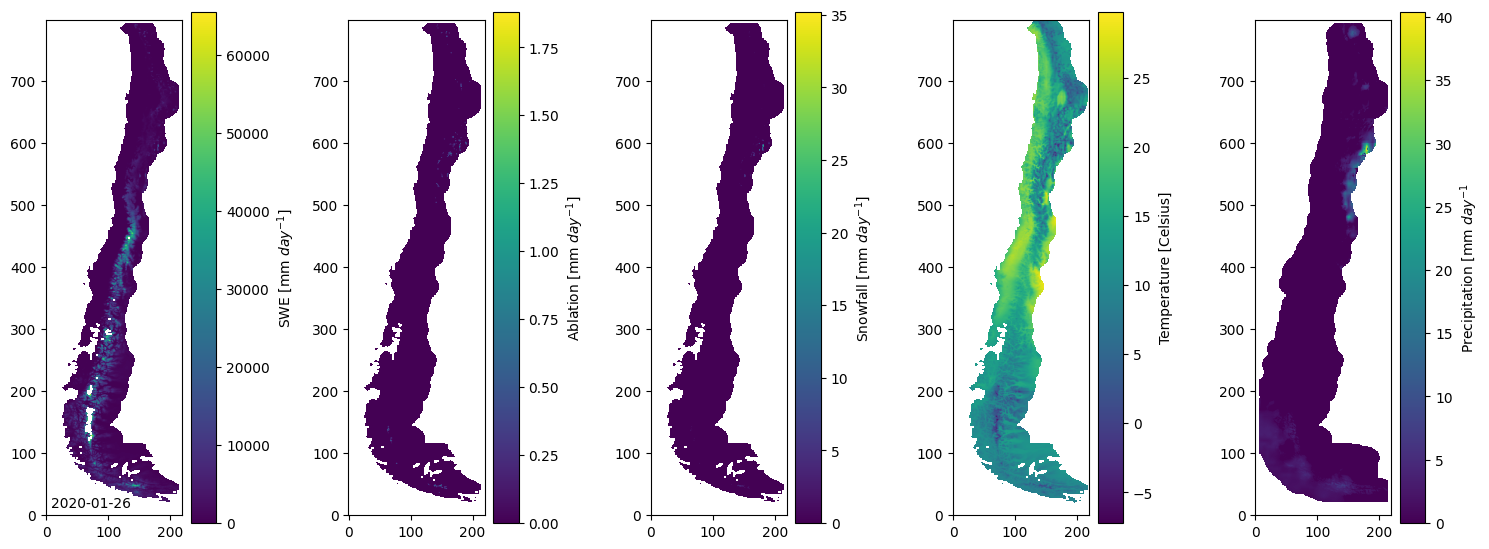

In [6]:
plot_swe_abla_snowfall_t_p_xday(15000)

##### Campos de Hielo Sur

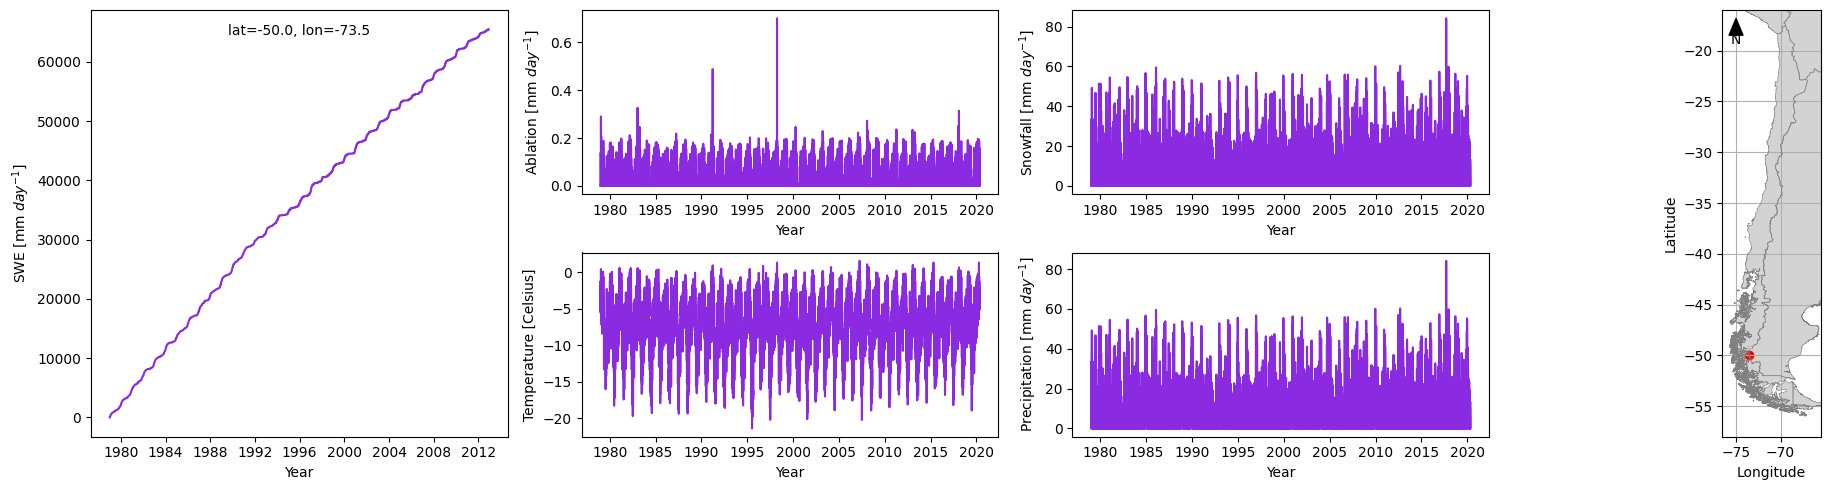

In [7]:
plot_swe_abla_snowfall_t_p_xcoordenadas(-50., -73.5) #app mayor acumulacion segun mapa xday

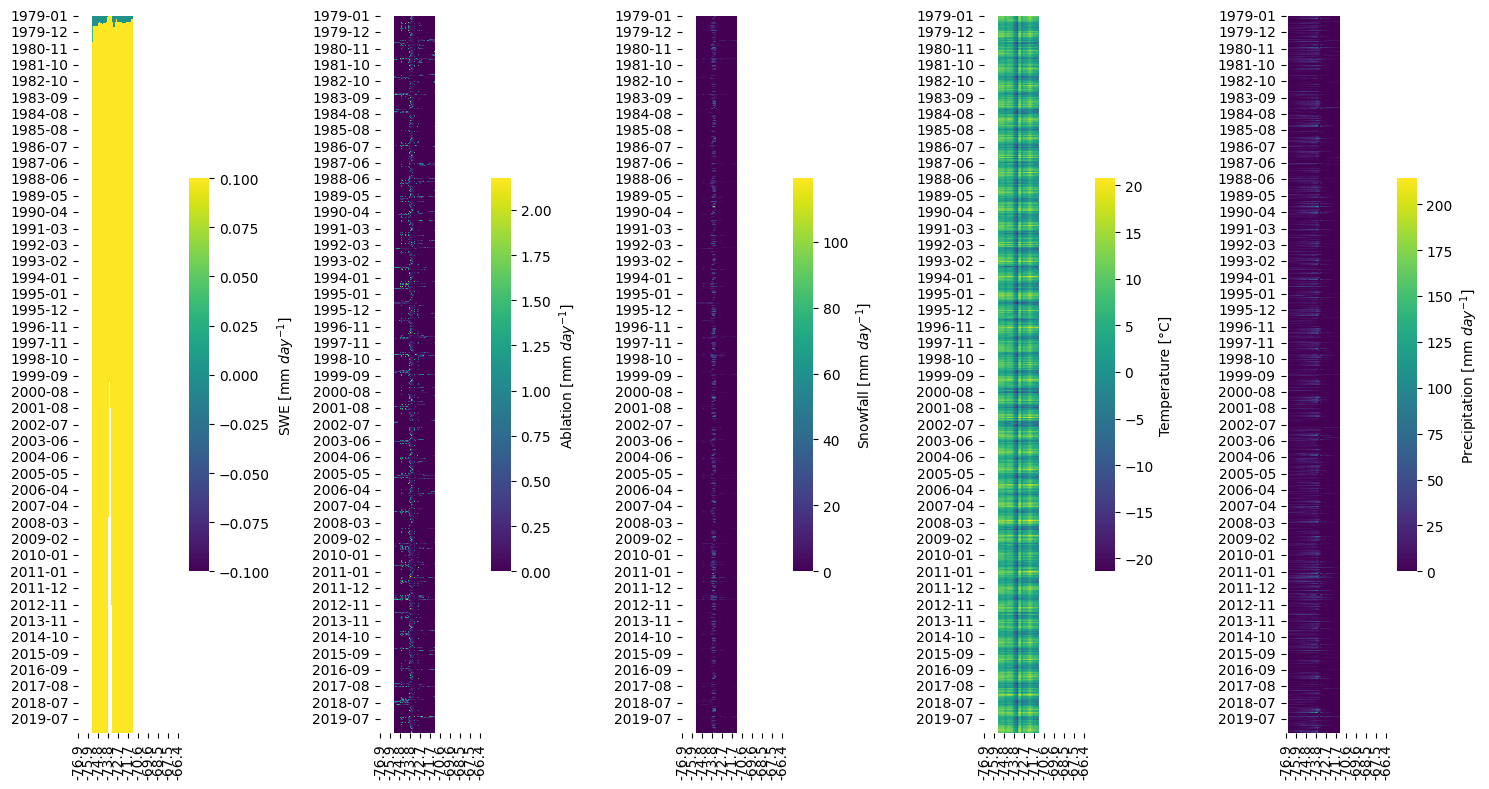

In [8]:
plot_swe_abla_snowfall_t_p_xlongitud(-50.)

##### Ojos del Salado

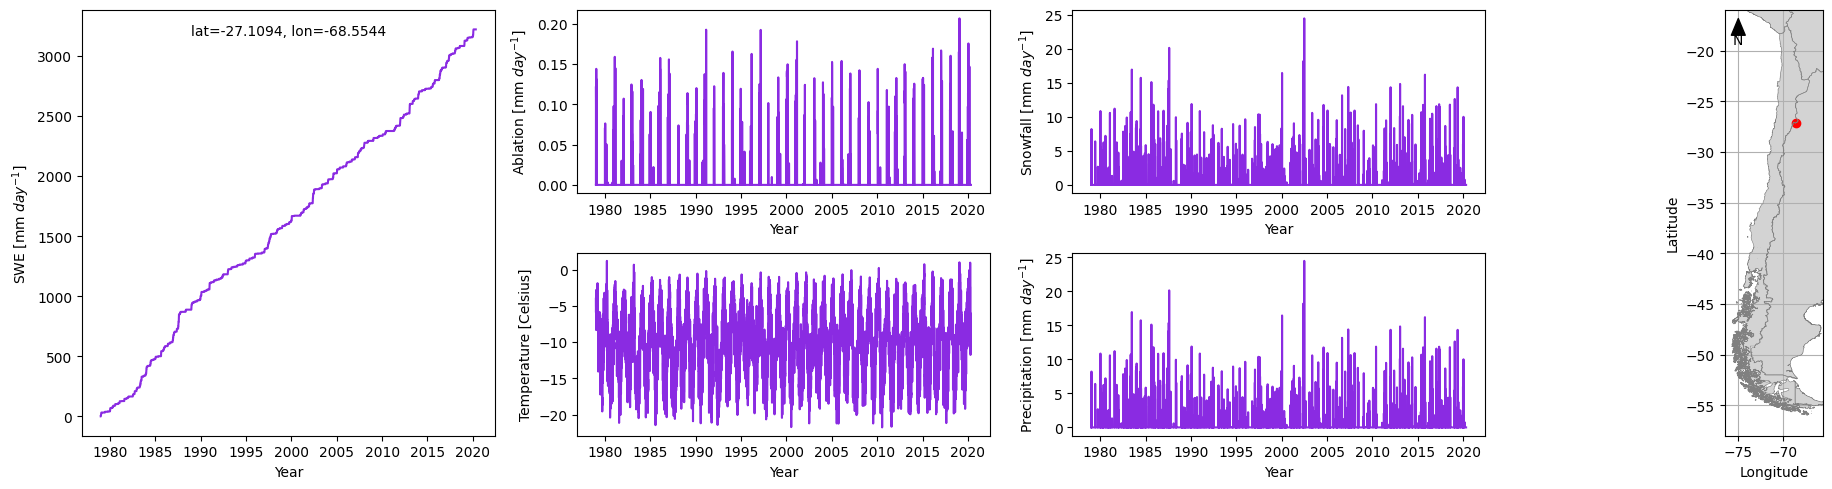

In [9]:
plot_swe_abla_snowfall_t_p_xcoordenadas(-27.1094, -68.5544) #Ojos del Salado

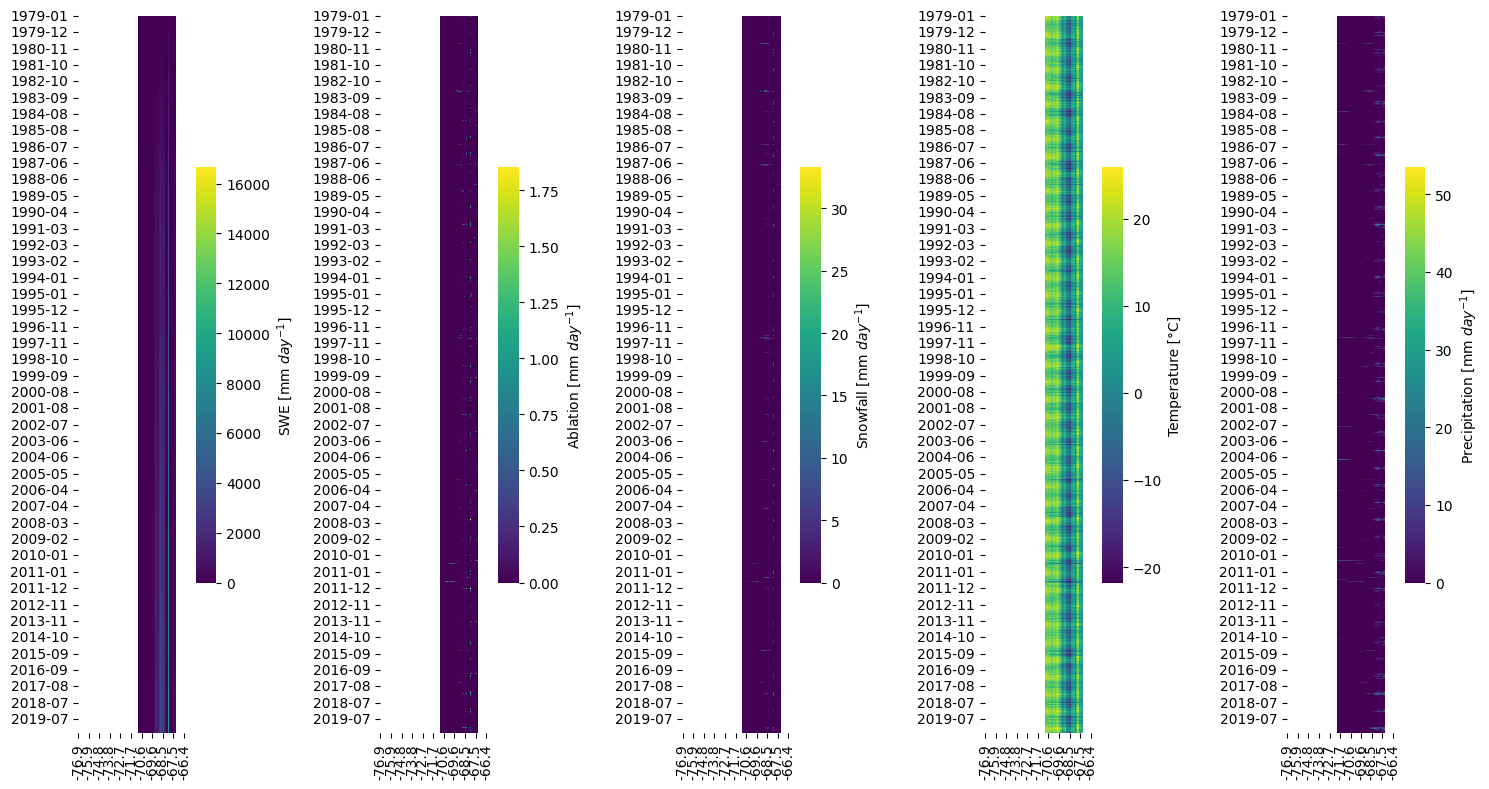

In [10]:
plot_swe_abla_snowfall_t_p_xlongitud(-27.1094)

##### Lugar Random

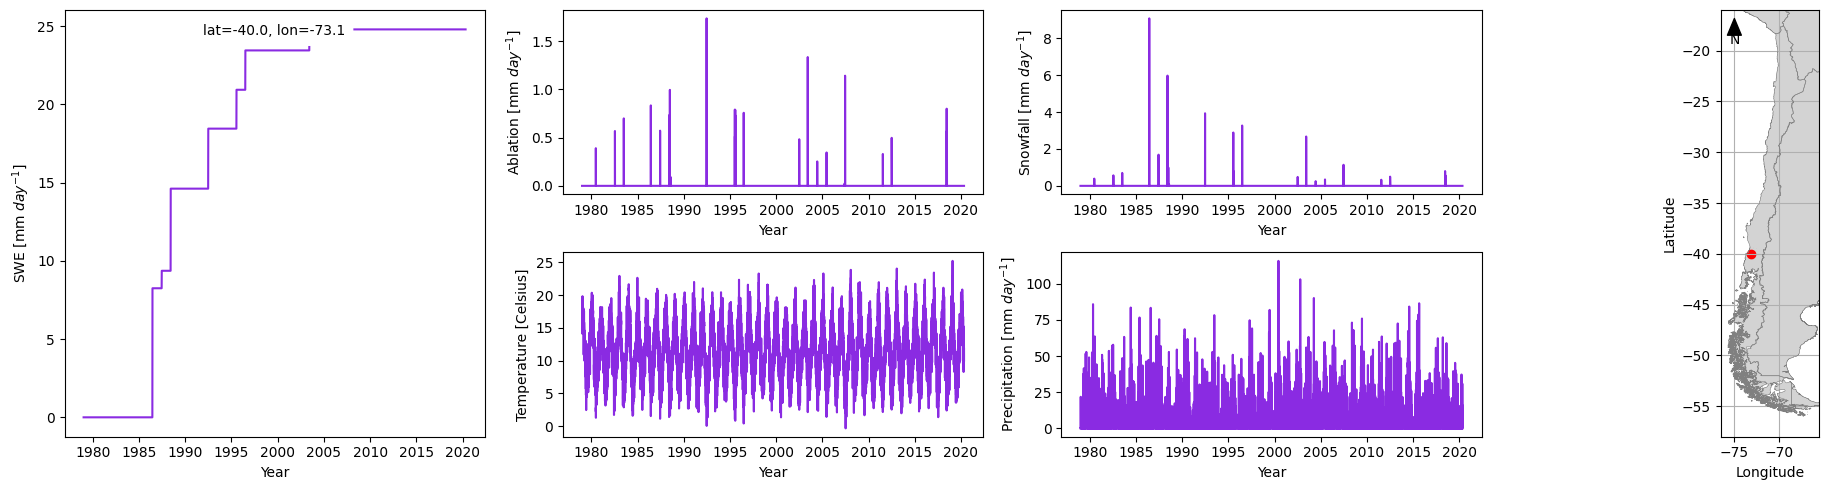

In [11]:
plot_swe_abla_snowfall_t_p_xcoordenadas(-40., -73.1) #lugar random

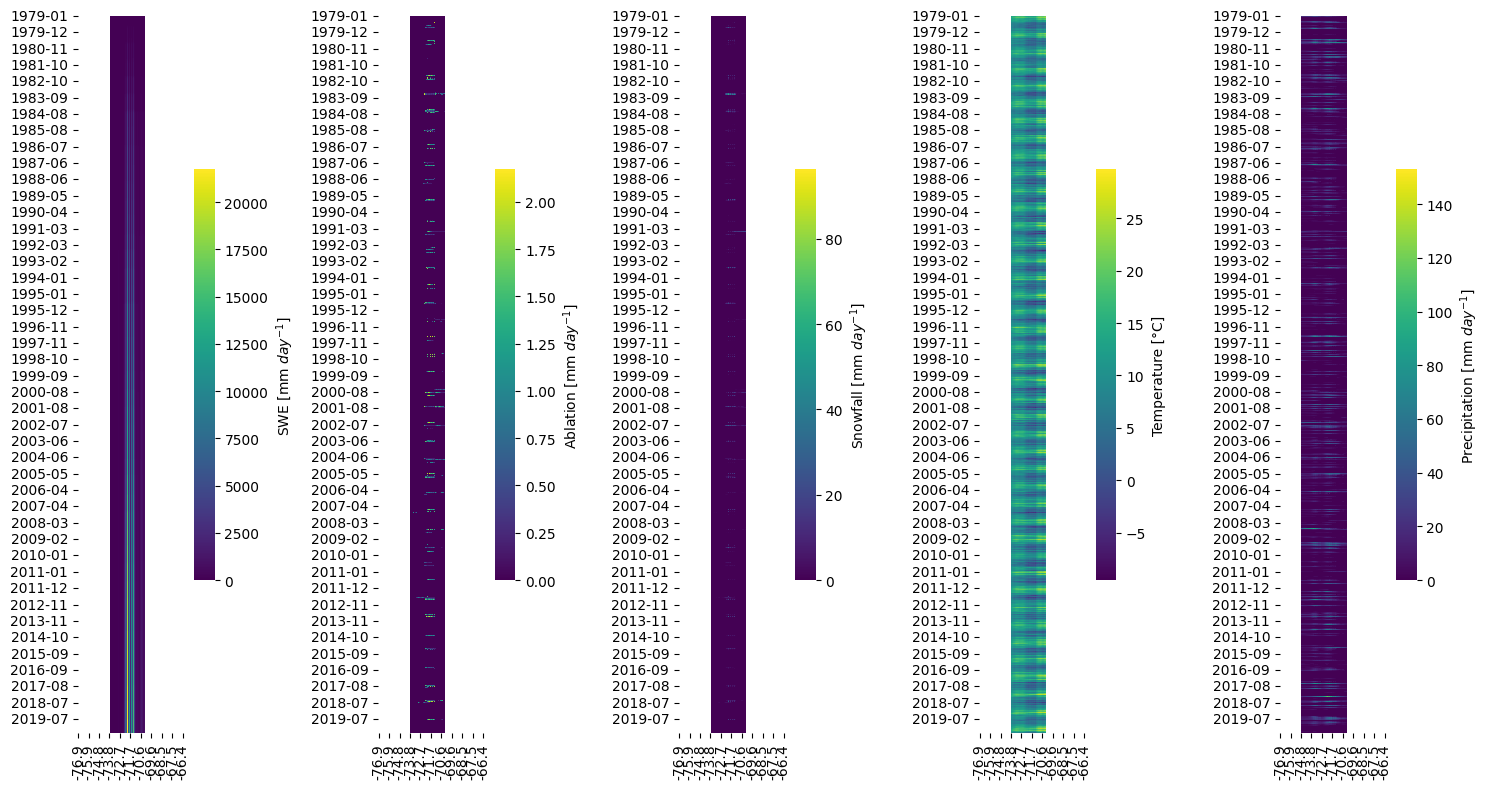

In [12]:
plot_swe_abla_snowfall_t_p_xlongitud(-40.)

##### Santiago

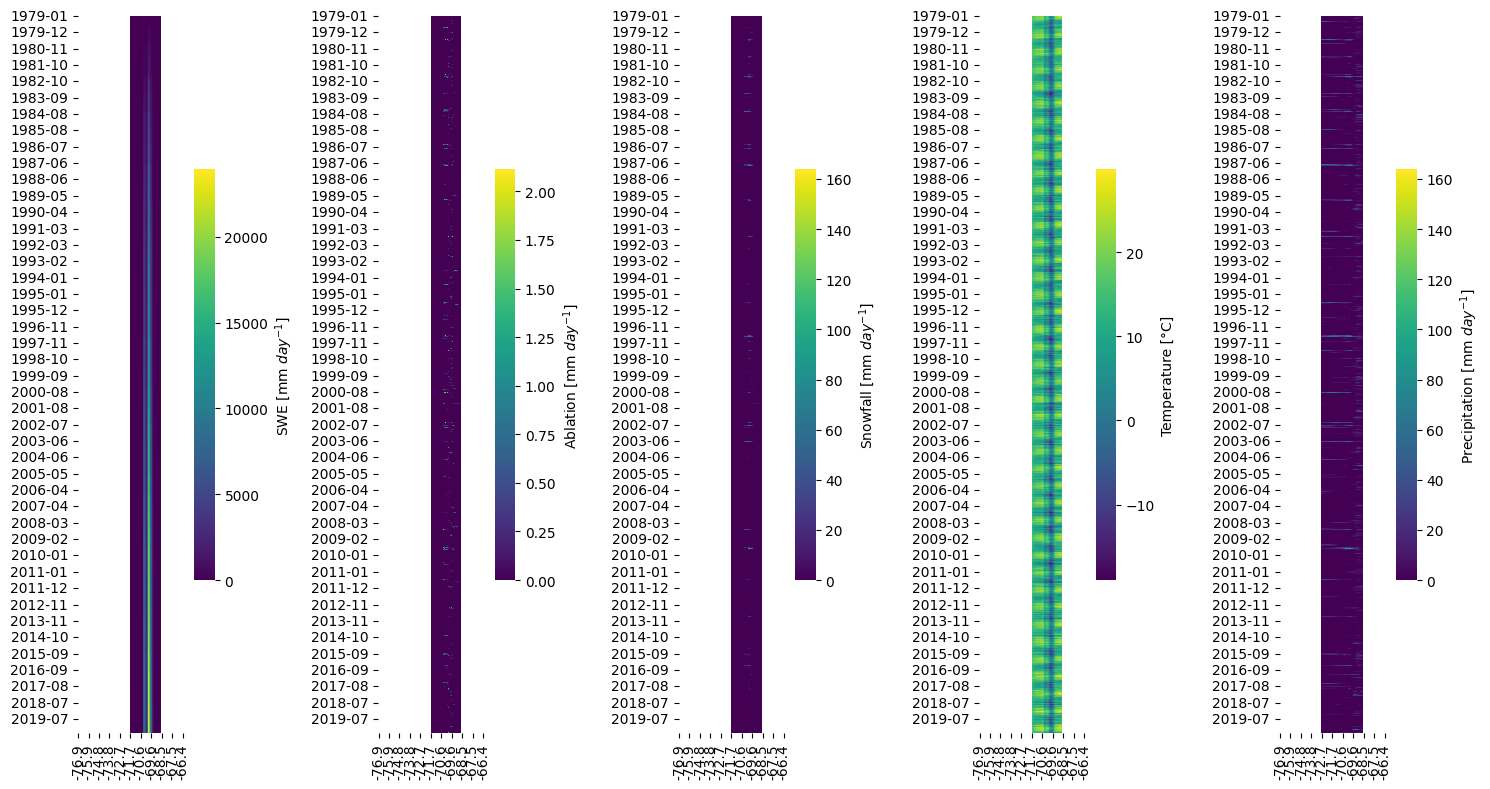

In [14]:
plot_swe_abla_snowfall_t_p_xlongitud(-33.45694)

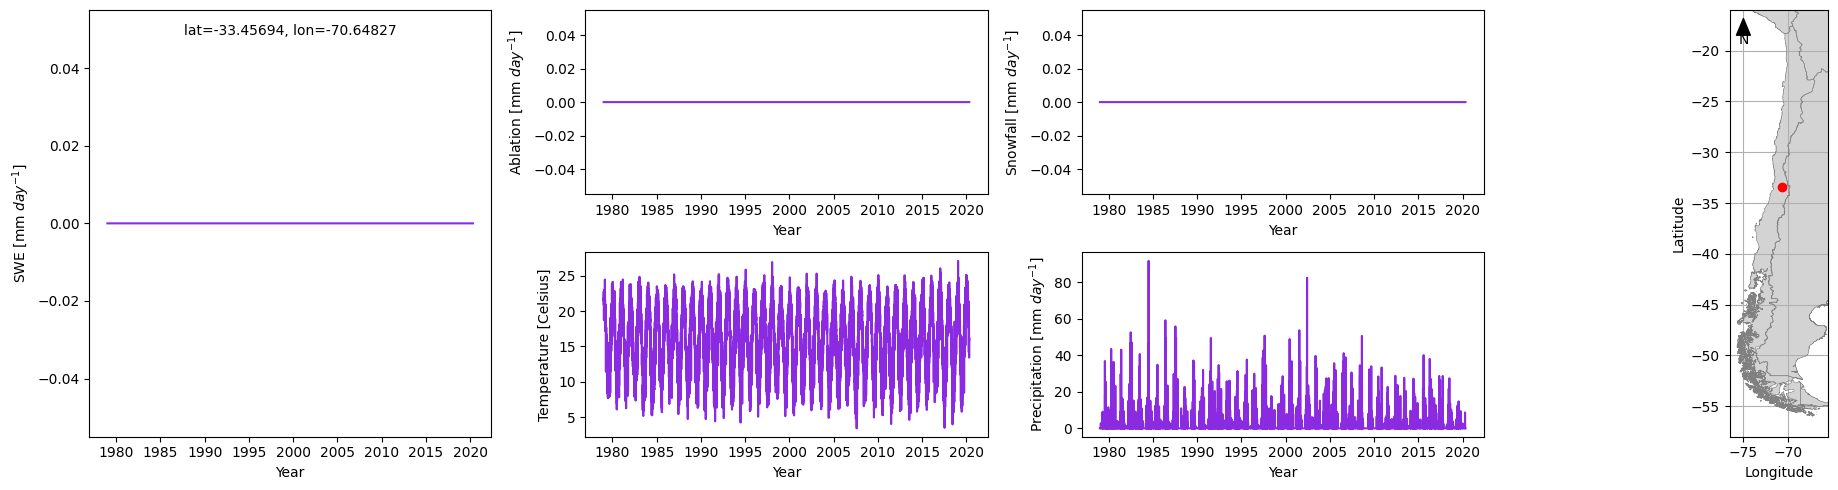

In [42]:
plot_swe_abla_snowfall_t_p_xcoordenadas(-33.45694, -70.64827) #Santiago

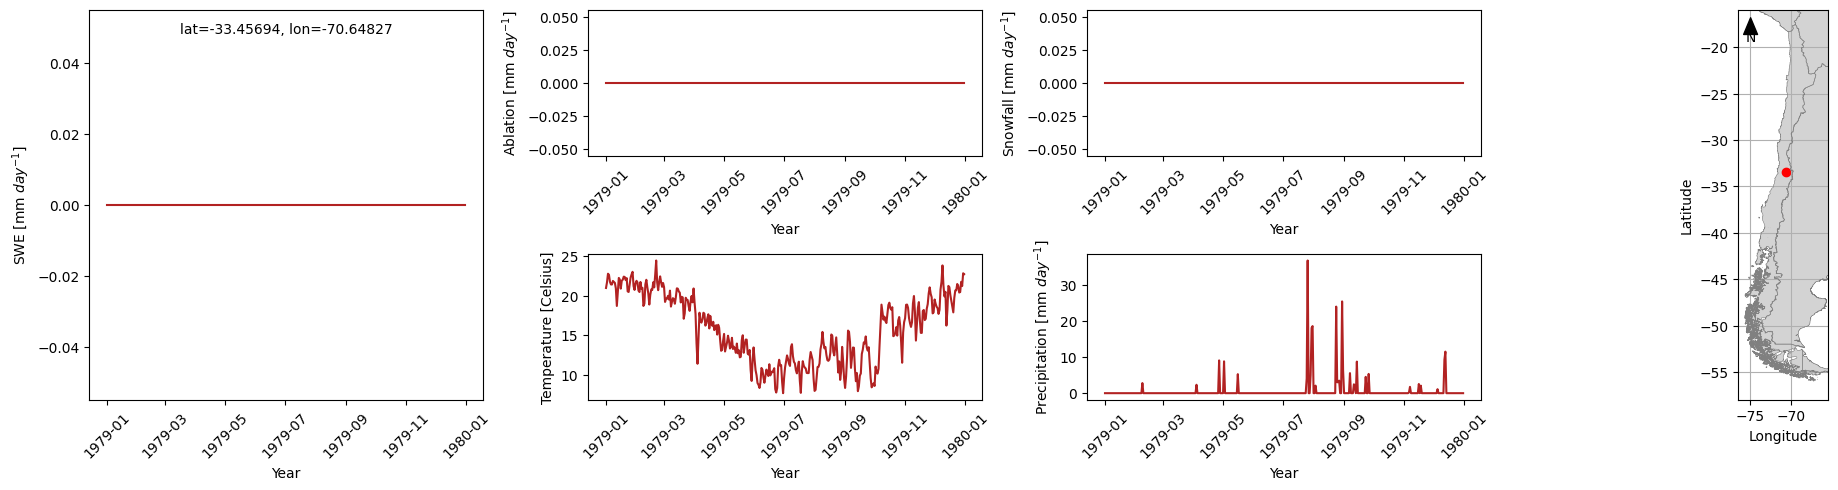

In [41]:
plot_swe_abla_snowfall_t_p_xcoordenadas__date(-33.45694, -70.64827,'1979-01-01', '1979-12-31')

##### Portillo

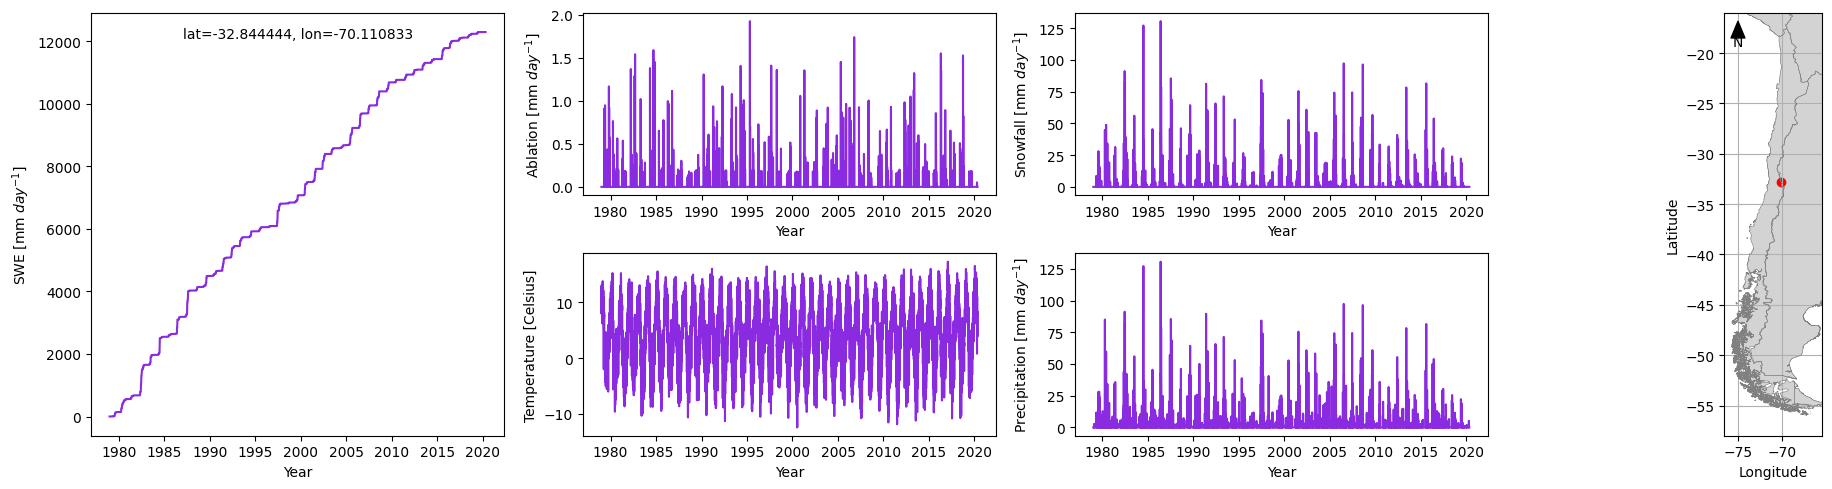

In [15]:
#Latitud	-32.844444
#Longitud	-70.110833

plot_swe_abla_snowfall_t_p_xcoordenadas(-32.844444, -70.110833) #portillo

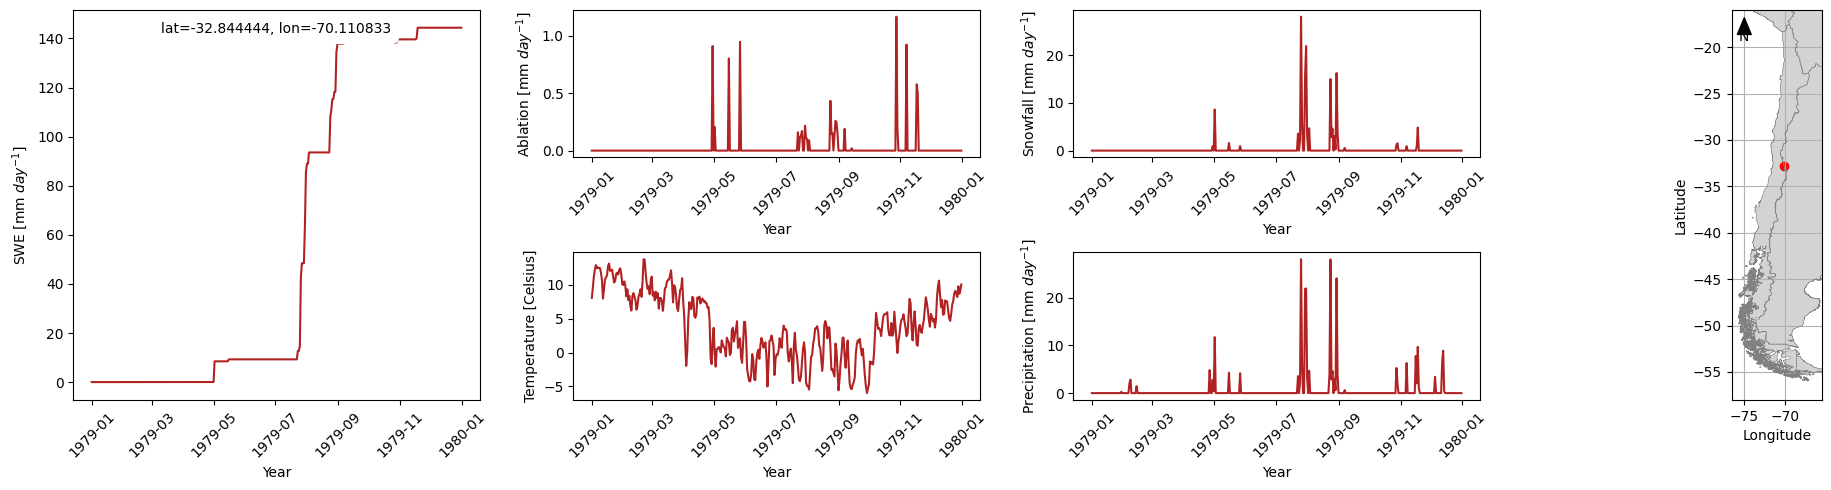

In [38]:
plot_swe_abla_snowfall_t_p_xcoordenadas__date(-32.844444, -70.110833,'1979-01-01', '1979-12-31')

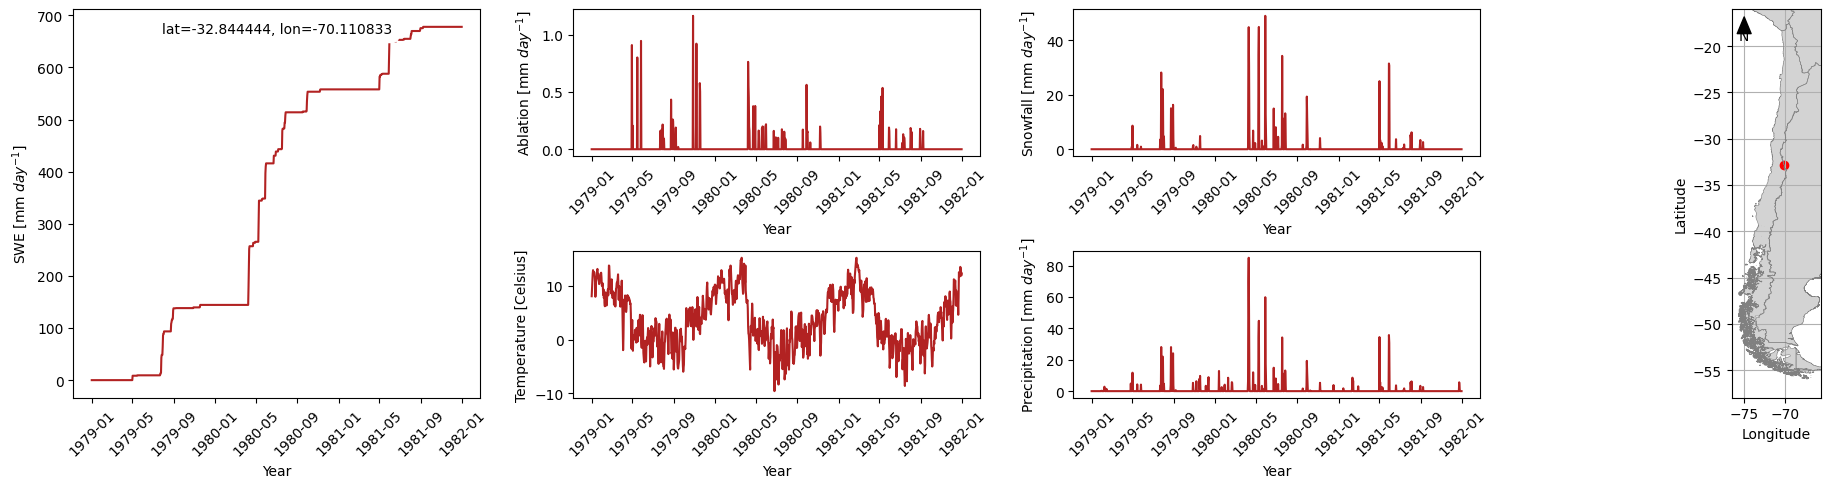

In [40]:
plot_swe_abla_snowfall_t_p_xcoordenadas__date(-32.844444, -70.110833,'1979-01-01', '1981-12-31')

In [16]:
# Combinar los DataFrames en uno solo
portillo = pd.concat([portillo1, portillo2, portillo3, portillo4])

portillo = pd.DataFrame(portillo)

portillo = portillo.drop(portillo.index[0])
portillo

,Nro.,Fecha-Hora de Medicion,Altura de Nieve (cm),Equiv. en agua S.Scale (mm)
1,2,30/09/2020 01:54,27.0,623.42
2,3,30/09/2020 02:54,27.1,629.26
3,4,30/09/2020 03:54,27.1,633.64
4,5,30/09/2020 04:54,27.1,638.02
5,6,30/09/2020 05:54,27.2,638.02
...,...,...,...,...
2100,2101,29/03/2020 19:54,10.0,104.00
2101,2102,29/03/2020 20:54,10.0,275.00
2102,2103,29/03/2020 21:54,10.0,278.00
2103,2104,29/03/2020 22:54,9.0,280.00


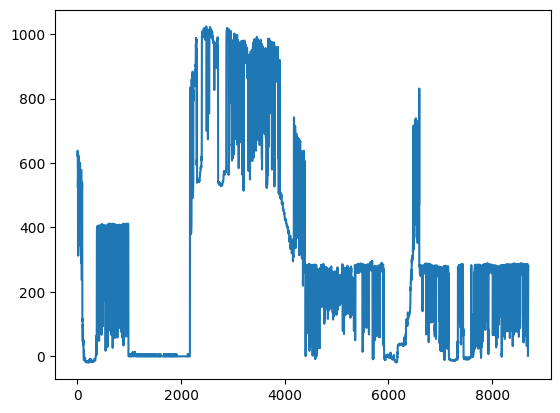

In [17]:
SWE_portillo = portillo['Equiv. en agua S.Scale (mm)']
plt.plot(range((portillo['Equiv. en agua S.Scale (mm)'].shape[0])), SWE_portillo.values)

In [18]:
SWE_portillo

1       623.42
2       629.26
3       633.64
4       638.02
5       638.02
         ...  
2100    104.00
2101    275.00
2102    278.00
2103    280.00
2104    280.00
Name: Equiv. en agua S.Scale (mm), Length: 8699, dtype: float64

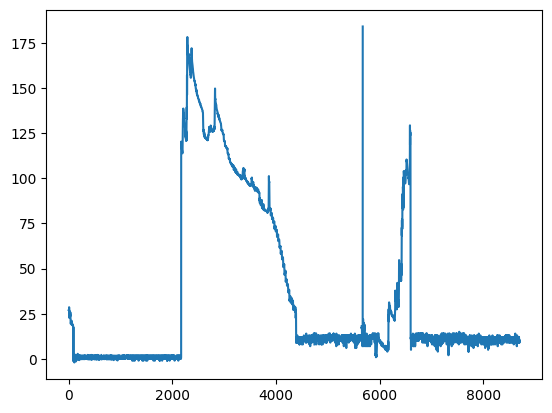

In [19]:
altura_nieve = portillo['Altura de Nieve (cm)']

# Trazar el gráfico
plt.plot(range(portillo.shape[0]), portillo['Altura de Nieve (cm)'])
plt.show()